<a href="https://colab.research.google.com/github/MidoriTinto/Python_For_Data_Analysis/blob/main/Sea_Level_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Looking for correlation between time data and sea level rise using Numpy array
---

### Data Source
Global Average Absolute Sea Level Change, 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; NOAA, 2015.
https://datahub.io/core/sea-level-rise

The data describes annual sea level changes around the world from 1880 to 2013 based on a combination of long-term tide gauge measurements and satellite measurements. Measures are adjusted using two standards: Commonwealth Scientific and Industrial Research Organisation(CSIRO) and National Oceanic and Atmospheric Administration (NOAA)  

Raw Data file:  https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv


*On average, the ocean floor has been gradually sinking since the last Ice Age peak- almost 20000 years ago.(source: https://datahub.io/core/sea-level-rise)*

### 1. Investigating the data set
---
The data set is imported. The data frame is called 'sea_level'.

In [ ]:
import pandas as pd 
import numpy as np
from scipy.stats import linregress

url="https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv"
sea_level_predictor=pd.read_csv(url)
sea_level_predictor


,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


In [ ]:
sea_level_predictor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [ ]:
sea_level_predictor.head(20)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
5,1885,0.531496,-0.330709,1.393701,NaN
6,1886,0.437008,-0.381890,1.255906,NaN
7,1887,0.216535,-0.602362,1.035433,NaN
8,1888,0.299213,-0.519685,1.118110,NaN
9,1889,0.362205,-0.456693,1.181102,NaN


The dataframe 'sea_level' has 134 rows and 5 columns ('year', CSRIO Adjusted Sea Level, Lower Error Bound,Upper Error Bound and NOAA Adjusted Sea level). The 'NOAA Adjusted Sea Level' column only contains 21 non-null values compared to the other columns. Hence, for further analysis we will focus on the 'CSIRO Adjusted Sea Level' column. 


###2.  Calculate some basic statistics on the CSIRO Adjusted level array (e.g. mean, standard deviation, total)


Before we calculate some basic statistics we check the statistics by using df.describe()

In [ ]:
sea_level_predictor.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


Having foung the values for mean, standard deviation we can now proceed to calculate these ourselves. 

1.   First we store columns year and CSIRO columns into two different arrays: year_arr and sea_level_arr
2.   Using both arrays we proceed to calculate the mean, standard deviation, total max and minimum value.

1.   Use the fact that the arrays are aligned (e.g. the first number in the level array is linked to the first year in the year array and display:

*  the year with the biggest rise in level
*  the year with the lowest rise in level

*(**Hint**:  to do this np.where() can be used)*
 ```
np.where(array == value_to_find)
```
*There is some reference material [here](https://thispointer.com/find-the-index-of-a-value-in-numpy-array/)*

**Note**: ```np.where(...)``` will return a tuple containing all indexes where that value was found.  You can print all, or you can print the first value (it is likely that there will only be one in this case) using [0][0].  *With the correct code you should get an answer of 2012*


3.  Calculate the Pearson product-moment correlation coefficient between year and the rise in sea level.  (*Expected output:  0.98 when rounded to 2 decimal places*)






In [ ]:


def sea_level():
  #storing the values of column 'year' and column 'CSIRO Adjusted Sea Level', datatypes:int64, float64
  #defining the data types of each array
  year_arr=sea_level_predictor["Year"].to_numpy(np.int64)
  sea_level_arr=sea_level_predictor["CSIRO Adjusted Sea Level"].to_numpy(np.float64)

  #calculating some basic statistics on sea_level_arr
  #calculates the mean
  average_level=sea_level_arr.mean() 
  #calculated de standard deviation
  SD=sea_level_arr.std()    
  #calculating the sum of all sea_level_arr values
  total=sea_level_arr.sum() 
  #calculating the max adjusted sea level
  max=sea_level_arr.max()
  #calculating the min adjusted sea level
  min=sea_level_arr.min()


  #return  average_level, SD, total, coeff, max, (year_arr[biggest_year]), (year_arr[lowest_year])
  print("\n average:    ", average_level, "\n standard deviation:", SD,"\n total:", total, "\n max.",  max, "\n min:", min)


sea_level()


 average:     3.650340811880598 
 standard deviation: 2.476399631426498 
 total: 489.1456687920001 
 max. 9.326771644 
 min: -0.440944881


The basic statistics calculated above on the CSIRO adjusted sea level are the same obtained previously using the df.describe function (see screenshot below.) 


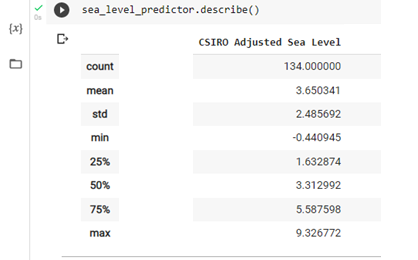

###3. Finding out the year with the highest and lowest sea level rise
---

 Using the fact that the arrays are aligned (e.g. the first number in the level array is linked to the first year in the year array and display):

*  the year with the biggest rise in level
*  the year with the lowest rise in level

*(**Hint**:  to do this np.where() can be used)*
 ```
np.where(array == value_to_find)
```
*There is some reference material [here](https://thispointer.com/find-the-index-of-a-value-in-numpy-array/)*

**Note**: ```np.where(...)``` will return a tuple containing all indexes where that value was found.  You can print all, or you can print the first value (it is likely that there will only be one in this case) using [0][0].  *With the correct code you should get an answer of 2012*


In [ ]:
def sea_level_rise():
  #storing the values of column 'year' and column 'CSIRO Adjusted Sea Level', datatypes:int64, float64
  #defining the data types of each array
  year_arr=sea_level_predictor["Year"].to_numpy(np.int64)
  sea_level_arr=sea_level_predictor["CSIRO Adjusted Sea Level"].to_numpy(np.float64)

  #Calculating the max sea level
  max=sea_level_arr.max()

  #Calculating the min sea level
  min=sea_level_arr.min()
 
  #Using max and min values to calculate the years in which the sea level rose at its highest and lowest respectively
   #here we use the function np.where() to specify what we are looking for in the array
  #[0] [0] tell us the position aka the year in which the max. value is found
  biggest_year=np.where(sea_level_arr==max)[0][0]
  lowest_year=np.where(sea_level_arr==min)[0][0]

  #return (year_arr[biggest_year]), (year_arr[lowest_year])
  print("\n year with the LOWEST sea_level: ", (year_arr[lowest_year]),"\n year with the HIGHEST sea_level: ",  (year_arr[biggest_year]), )


sea_level_rise()





 year with the LOWEST sea_level:  1882 
 year with the HIGHEST sea_level:  2012


The year with the lowest sea level was 1882 while the highest was 2012. We will now look into the correlation of these variable to see whether the sea level have increase per year.

###4. Is there a correlation between 'year' and 'sea level' 
---

The Pearson (product-moment) correlation coefficient is a measure of the linear relationship between two features, in this case time (year) and sea level. It is often denoted with the letter r and called Pearson’s r. The closer the values are to 1 the more positive the correlation between the two features is. The closer to -1 the less correlation there is. Pearson's r can take any value in the range −1 ≤ r ≤ 1.

In [ ]:
def year_sea_correlation():
  #storing the values of column 'year' and column 'CSIRO Adjusted Sea Level', datatypes:int64, float64
  #defining the data types of each array
  year_arr=sea_level_predictor["Year"].to_numpy(np.int64)
  sea_level_arr=sea_level_predictor["CSIRO Adjusted Sea Level"].to_numpy(np.float64)

  #Calculating the association between variables or features of a dataset.
  #In this case we are looking at the correlation between year and sea level.
  coeff=np.corrcoef(year_arr, sea_level_arr)

  return coeff
  
year_sea_correlation()

 
  
  

array([[1.        , 0.98475713],
       [0.98475713, 1.        ]])

The Pearson's correlation coefficient (r) for year and sea_level is 0.98 showing a positive correlation between both the sea level and time(year). 

### 5. Predicting sea levels for 2050
---


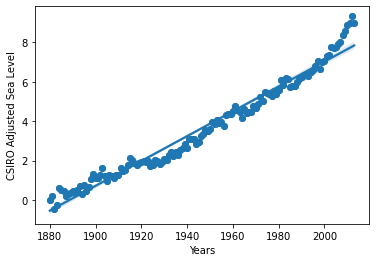

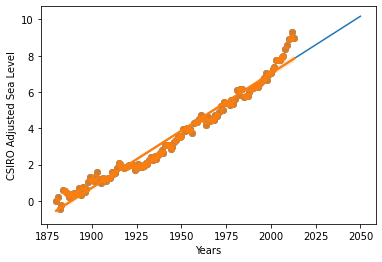

LinregressResult(slope=0.0630445840121348, intercept=-119.06594196773978, rvalue=0.984757131182585, pvalue=3.7886969791131554e-102, stderr=0.000969211871328715) 
 slope: 0.0630445840121348 
 r square: 0.984757131182585 
 y-intercept: -119.06594196773978 
 p value= 3.7886969791131554e-102


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


def predicting_sea_levels():
  #assigning 'Year' to x and 'CSIRO Adjusted Sea Level' to y
  x=sea_level_predictor["Year"]
  y=sea_level_predictor["CSIRO Adjusted Sea Level"]

  #plotting the original data from year 1880 to 2012 with a line of best fit
  plt.scatter(x,y)
  regression=linregress(x,y)
  slope=regression.slope
  intercept = regression.intercept
  
  chart=sns.regplot(x=x, y=y)
  chart.set_xlabel('Years')
  chart.set_ylabel('CSIRO Adjusted Sea Level')
  plt.show()

  #predicting sea levels rising to year 2050
  plt.scatter(x,y)
  regression = linregress(x,y)#THEN ASSIGN RESULT OF REGRESSION TO THE PLOT
  slope = regression.slope
  intercept = regression.intercept
  prediction=np.arange(1880,2051)
  plt.plot(prediction, slope*prediction + intercept)#PLOT LINE REGRESSION
  chart=sns.regplot(x=x, y=y)
  chart.set_xlabel('Years')
  chart.set_ylabel('CSIRO Adjusted Sea Level')
  plt.show()

  
  print(regression,"\n", "slope:", regression.slope,"\n", "r square:", regression.rvalue,"\n", "y-intercept:", regression.intercept,"\n","p value=",regression.pvalue)

predicting_sea_levels()

*The top graph shows the linear correlation with a line of best fit up until year 2012. The  bottom graph shows line of best fit up until year 2050. It is clear from the data that there has been a significant (p<0.05) increase in sea levels over the years (r=0.98, slope=0.063) and that the trend will continue for years to come. However, not as it has so far. From year 2000 sea levels have increased steeply. It is therefore necessary to look at the data from 2000 onwards separately, and recalculate a line of best to be able to make a more accurate prediction.*

**Calculating a line of best fit from year 2000 to year 2050**

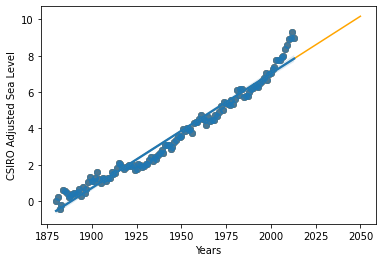

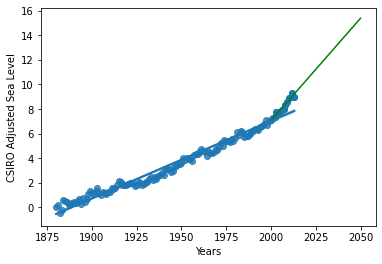

LinregressResult(slope=0.1664272733318682, intercept=-325.7934668059649, rvalue=0.9762875716140618, pvalue=2.4388064141618245e-09, stderr=0.010652933111541163) 
 slope: 0.1664272733318682 
 r square: 0.9762875716140618 
 y-intercept: -325.7934668059649 
 p value= 2.4388064141618245e-09


In [ ]:
def predicting_sea_levels():
  x=sea_level_predictor["Year"]
  y=sea_level_predictor["CSIRO Adjusted Sea Level"]

  #plotting the data  and line of best fit from 1880 to 2012 (blue)
  plt.scatter(x,y)
  regression=linregress(x,y)
  slope=regression.slope
  intercept = regression.intercept
  #line of best fit from year 2012 to year 2050 (orange)
  plt.scatter(x,y)
  regression = linregress(x,y)
  slope = regression.slope
  intercept = regression.intercept
  prediction=np.arange(1880,2051)#making the prediction
  plt.plot(prediction, slope*prediction + intercept, color='orange')#PLOT LINE REGRESSION
  chart=sns.regplot(x=x, y=y)
  chart.set_xlabel('Years')
  chart.set_ylabel('CSIRO Adjusted Sea Level')
  plt.show()#top graph, bottom graph above

  #x and y  values from year 2000 onwards to calculate a line of best fit (blue)
  x2=sea_level_predictor[sea_level_predictor["Year"]>=2000]['Year']
  y2=sea_level_predictor[sea_level_predictor['Year']>=2000]["CSIRO Adjusted Sea Level"]

  plt.scatter(x2,y2)
  regression=linregress(x2,y2)
  slope=regression.slope
  intercept = regression.intercept
  prediction=np.arange(2000,2051)#making the prediction from year 2000 to year 2051
  plt.plot(prediction, slope*prediction + intercept, color='green')#PLOT LINE REGRESSION
  chart=sns.regplot(x=x, y=y)
  chart.set_xlabel('Years')
  chart.set_ylabel('CSIRO Adjusted Sea Level')
  plt.show()#bottom graph showing how different line of best fits are
  print(regression,"\n", "slope:", regression.slope,"\n", "r square:", regression.rvalue,"\n", "y-intercept:", regression.intercept,"\n","p value=",regression.pvalue)
predicting_sea_levels()

*The top graph here is the same as the one created in the previous exercise and is here just for reference (slope=0.063, r=0.984757131182585, p=3.7886969791131554e-102, sd=0.000969). The bottom graph shows how the line of best fit (green) from year 2000 onwards is much steeper (slope=0.166, p< 0.05) than the line (blue) created with data from before year 2000 (slope=0.063). This was expected since the data collected from 2000 onwards indicated a faster increase in sea levels over time. By plotting a line of best fit based on the data from 2000 onwards a more reliable prediction for year 2050 can be made. The results indicate that sea levels may rise much more rapidly than before.*

# Conclusion
---
*The data used in this project has shown that there is a significant correlation between sea level rise and time. Although the rise in sea level has been constant since 1880, from year 2000 the rise has been much faster. Thus in order to make an appropriate prediction about the sea level rise for year 2050 a new line of best fit was calculated using the data from 2000 onwards. Plotting all data together including the appropriate lines of best fits showed how much faster the sea level would rise by 2050. This is in line with a study published back in 2019 in which it was projected that in both low and high emission scenarios the sea level would rise between 30 and 34 cms by 2050 generating in turn a rise in the frequency of coastal floodings leading to the displacement of people among other consequences (L.Bamber, Jonathan; Oppenheimer, Michael; E. Kopp, Robert; P. Aspinall, Willy; M. Cooke, Roger (May 2019). "Ice sheet contributions to future sea-level rise from structured expert judgment". Proceedings of the National Academy of Sciences.).*


# Reflection
----

## What skills have you demonstrated in completing this notebook?

Your answer: Transforming datasets into numpy arrays for analysis and making predictions based on available data

## What caused you the most difficulty?

Your answer: creating a new line of best fit that would make a more accurate prediction for year 2050. 